# Homework 6
#### CHE 116: Numerical Methods and Statistics


2/21/2019

----

# 1. Plotting Distributions (20 Points)

For the following problems, choose the distribution that best fits the process and plot the distribution. State whether the sample space is discrete, the range of the sample space, and then use that to justify your choice of distribution. Make sure your axes labels are descriptive and not just the variable letters.


### 1.1

About 3 deer cross through my yard each day in winter. What is the distribution that could explain the random variable of number of deer? Remember to read the instructions above!

### 1.1 Answer
Discrete, 0 to the total deer population in North America, Poisson.

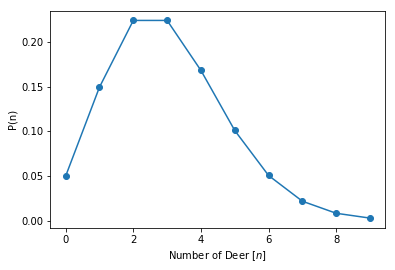

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb, factorial

n = np.arange(10)
mu = 3
p = mu**n * np.exp(-mu) / factorial(n)
plt.xlabel('Number of Deer [$n$]')
plt.ylabel('P(n)')
plt.plot(n, p, '-o')
plt.show()

### 1.2

You sleep about 8 hours per night with standard deviation of 2. What distribution could explain the random variable of number of hours slept?

### 1.2 Answer

Continuous, 0 to infinity, normal since < 0 and > 12 won't have high enough probability to matter. You could justify a binomial as well, if you restrict yourself to counting discrete hours.

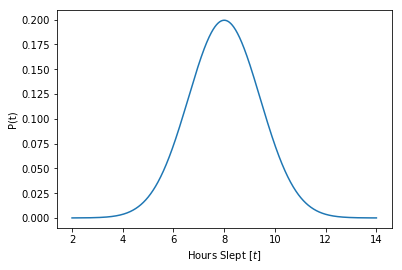

In [34]:
from math import pi
mu = 8
s = 2
x = np.linspace(2, 14, 1000)
Px = 1 / np.sqrt(2 * pi) / s * np.exp(-(mu - x)**2 / (2 * s))

plt.plot(x, Px)
plt.xlabel('Hours Slept [$t$]')
plt.ylabel('P(t)')
plt.show()

### 1.3

You are going out to read your poetry. You can go to only one of three different poetry readings. At each poetry reading, they randomly select a poet to read for a given number of timeslots. You can read multiple times, since you have many poems to read. At CLUB POET, there will be 11 poem reading timeslots and your probability of reading at particular timeslot is 0.4. At THE DEAD HEDGEHOG, there will be 5 timeslots and your probability of reading will be 0.5. At THE DANCING CLOUD, there are 7 timeslots and your probability of reading will be 0.7. Plot each of the distributions representing number of poems read for the different poetry readings. You should plot three distributions.

Each have a maximum number of poems read, which is the discrete upper limit for sample space. 0 is the lower bound. Binomial best fits.

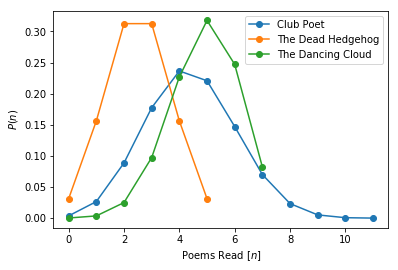

In [40]:
Ns = [11, 5, 7]
ps = [0.4, 0.5, 0.7]
names = ['Club Poet', 'The Dead Hedgehog', 'The Dancing Cloud']

for N,p, l in zip(Ns, ps, names):
    n = np.arange(N + 1)
    plt.plot(n, comb(N, n) * p**n * (1 - p)**(N - n), '-o', label=l)
plt.legend()
plt.xlabel('Poems Read [$n$]')
plt.ylabel('$P(n)$')
plt.show()

### 1.4

You recently got a boyfriend. Your boyfriend texts you about every 20 minutes. What distribution could represent the time between text messages?

$t > 0$, continuous, exponential best fits.

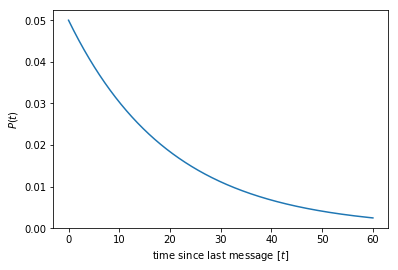

In [43]:
t = np.linspace(0,60, 1000)
lamb = 1 / 20.
plt.plot(t, lamb * np.exp(-lamb * t))
plt.xlabel('time since last message [$t$]')
plt.ylabel('$P(t)$')
plt.show()

# 2. Loops (20 Points)
For the following problems, use loops to solve them. You cannot use `numpy` arrays. Justify your choice of distribution, state what quantity is being asked (probability of sample, interval, or  prediction interval), and answer the prompt in words. The only formula you may use for expected value is $E[x] = \sum P(x) x$.

### 2.1 (Warmup)

Show that the binomial distribution sums to one over the whole sample space. 

### 2.2

You ask your students questions during lecture and offer candy bars if they get problems correct. You ask 12 questions per lecture and the students get the questions right with probability 0.7. How many candy bars should you bring to have enough for 90% of the lectures?

### 2.2 Answer
This is a binomial, since you ask a fixed number of questions but the probability of success is only 0.7. The question is asking about a prediction interval. If you take 10 candy bars, you will have enough just more than 90% of the time.

In [51]:
N = 12
p = 0.7
psum = 0
for ni in range(N + 1):
    psum += comb(N, ni) * p**ni * (1 - p)**(N - ni)
    if psum > 0.9:
        break
print(ni)

10


### 2.3

About 25 per 100,000 people die per year in a car accident. How many years can you drive before there is a 10% chance of dying? 

### 2.3 Answer

This is a geometric distribution, since it's unbounded and you stop on success. We are being asked a prediction interval. If you drive your car for 423 years, you will have a 10% chance of dying.

In [8]:
p = 25 / 1e5
psum = 0
i = 1
while psum < 0.1:
    psum += p*(1 - p)**i
    i += 1
print(i)

423


### 2.4

In a computer program, each line of code can cause a security vulnerability. A particular company finds that after 1 year, there are 25 security vulnerabilities per 10,000 lines of code. After inspecting a new program which contains 23,000 lines of code, they find 11 secutity vulnerabilities. What is the probability that they found all vulnerabilities?

### 2.4 Answer

This is a Poison distribution. We are asking about the probability of interval. There is a 0.1% chance that all vulnerabilities were caught.

In [56]:
psum = 0
mu = 25
for i in range(12):
    psum += mu**i * np.exp(-mu) / factorial(i)
print(psum)

0.0014159729740810289


# 3. Normal Distribution


### 3.1 (2 Points)

Take $\mu = 3$ and $\sigma = 4$. What is $P(-4 < x < 0)$?

### 3.1 Answer

In [57]:
ss.norm.cdf(0, scale=4, loc=3) - ss.norm.cdf(-4, scale=4, loc=3)

0.18656819551305112

### 3.2 (2 Points)

You spend 111 minutes per day thinking about what to eat, with a standard deviation of 30. What is the probability you spend 43 minutes thinking about food?

### 3.2 Answer
0

### 3.3 (2 Points)

Using the numbers from 3.2, what is the probability that you spend more than 2 hours thinking about food in a day?

### 3.3 Answer

In [58]:
1 - ss.norm.cdf(120, loc=111, scale=30)

0.38208857781104744

### 3.4 (4 Points)

What is unphysical about the sample space implicitly defined in problem 3.2? Compute a quantity to prove that the unphysical part of the sample space is negligible. 

### 3.4 Answer

It is not possible to think for a negative number of minutes. Using the calculation below, we see that the probability of having negative values is 0.001, so there are rarely any consequences of our unphysical assumption.

In [60]:
ss.norm.cdf(0, loc=111, scale=30)

0.00010779973347738823

### 3.5 (2 Points)

Take $\mu = -2$, $\sigma = 4$. Convert the following interval to z-scores: $(-4, 4)$. 

### 3.5 Answer


In [61]:
(-4 -- 2)/4, (4 -- 2) / 4

(-0.5, 1.5)

### 3.6 (4 Points)
Can $\sigma$ be negative? Why or why not?

### 3.6 Answer

No, because the exponentiated term in $p(x)$ would be positive leading to a divergent integral (unnomralized)

### 3.7 (2 Points)

How much probability is covered between Z-scores $-3$ to $3$?

### 3.7 Answer

In [62]:
ss.norm.cdf(3) - ss.norm.cdf(-3)

0.9973002039367398